In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
import seaborn as sns
import random

In [2]:
import pandas as pd
dataset = pd.read_csv("comp_fail_train_data.csv")
dataset['datetime'] = pd.to_datetime(dataset['datetime'])
#dataset['datetime'] = pd.to_datetime(dataset.datetime).dt.tz_localize(None)
#dataset['date'] = dataset['datetime'].dt.date
dataset = dataset.set_index('datetime')
display(dataset.head())
print(dataset.info())
print(dataset.describe())

,machineID,voltmean,rotatemean,pressuremean,vibrationmean,voltsd,rotatesd,pressuresd,vibrationsd,voltmean_24hrs,...,error3count,error4count,error5count,sincelastcomp1,sincelastcomp2,sincelastcomp3,sincelastcomp4,model,age,failure
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-02 05:00:00+00:00,BP3P13,179.178056,492.030275,91.155905,38.162571,27.497743,11.183028,17.366019,3.862876,169.970005,...,0,0,0,199.958333,4.958333,34.958333,124.958333,model1,15,none
2015-01-02 08:00:00+00:00,BP3P13,169.073051,451.528135,95.460869,42.752140,19.283389,75.098589,4.837571,3.597729,169.701752,...,0,0,0,200.083333,5.083333,35.083333,125.083333,model1,15,none
2015-01-02 11:00:00+00:00,BP3P13,170.608473,476.470942,100.674812,36.086376,21.764942,60.931854,12.521208,4.204943,169.790426,...,0,0,0,200.208333,5.208333,35.208333,125.208333,model1,15,none
2015-01-02 14:00:00+00:00,BP3P13,174.670838,475.862555,97.439909,36.744674,23.224006,23.873635,13.829958,1.797458,171.048564,...,0,0,0,200.333333,5.333333,35.333333,125.333333,model1,15,none
2015-01-02 17:00:00+00:00,BP3P13,182.207294,454.472370,95.440034,41.682170,14.765826,42.989149,15.565441,3.872835,174.611131,...,0,0,0,200.458333,5.458333,35.458333,125.458333,model1,15,none


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22621 entries, 2015-01-02 05:00:00+00:00 to 2015-09-30 02:00:00+00:00
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   machineID            22621 non-null  object 
 1   voltmean             22621 non-null  float64
 2   rotatemean           22621 non-null  float64
 3   pressuremean         22621 non-null  float64
 4   vibrationmean        22621 non-null  float64
 5   voltsd               22621 non-null  float64
 6   rotatesd             22621 non-null  float64
 7   pressuresd           22621 non-null  float64
 8   vibrationsd          22621 non-null  float64
 9   voltmean_24hrs       22621 non-null  float64
 10  rotatemean_24hrs     22621 non-null  float64
 11  pressuremean_24hrs   22621 non-null  float64
 12  vibrationmean_24hrs  22621 non-null  float64
 13  voltsd_24hrs         22621 non-null  float64
 14  rotatesd_24hrs       22621 non-null  fl

In [3]:
def seasonal_decompose_func(df, p=None, r=None):
    stl = STL(df, period=p, robust=r)
    result = stl.fit()
    seasonal, trend, resid = result.seasonal, result.trend, result.resid
    
    return seasonal, trend, resid

In [4]:
# For single column, need to mention the period
#seasonal, trend, resid = seasonal_decompose_func(data, p=7 ,r= True)

In [5]:
def ploting(df,seasonal,trend,resid):
    plt.figure(figsize=(20,12))

    plt.subplot(4,1,1)
    plt.plot(df)
    plt.title('Original Series', fontsize=16)

    plt.subplot(4,1,2)
    plt.plot(trend)
    plt.title('Trend', fontsize=16)

    plt.subplot(4,1,3)
    plt.plot(seasonal)
    plt.title('Seasonal', fontsize=16)

    plt.subplot(4,1,4)
    plt.plot(resid)
    plt.title('Residual', fontsize=16)

    plt.tight_layout() 

In [6]:
def iqr(resid, column, df):
    resid_mu = resid.mean()
    resid_dev = resid.std()

    lower = resid_mu - 1.5*resid_dev
    upper = resid_mu + 1.5*resid_dev
    
    upper_index = np.where(resid > upper)
    lower_index = np.where(resid < lower)
    
    anomalies = column[(resid < lower) | (resid > upper)]

    #plt.figure(figsize=(10,4))
    #plt.plot(column.index, column)
  
    #plt.scatter(anomalies.index, anomalies, color='r', marker='D')
    
    colmn_name = column.columns
    colmn_name = str(colmn_name[0])
    
    df[colmn_name] = "Normal"
    df.iloc[[upper_index], df.columns.get_loc(colmn_name)] = "Outlier"
    df.iloc[[lower_index], df.columns.get_loc(colmn_name)] = "Outlier"
    
    return anomalies, df

https://stackoverflow.com/questions/68095810/statsmodels-tsa-stl-stl-unable-to-determine-period-from-endog

If your time series does not have a known frequency on the index (e.g., sdf.index.freq is None, then you need to set the period of the seasonality using the period. seasonal tells STL how many full seasons to use in the seasonal LOWESS but doesn't tell STL how many observations are needed for a full period.

voltmean anomalies number is(2198, 1)
rotatemean anomalies number is(2213, 1)
pressuremean anomalies number is(2025, 1)
vibrationmean anomalies number is(2105, 1)
voltsd anomalies number is(2157, 1)
rotatesd anomalies number is(2146, 1)
pressuresd anomalies number is(2152, 1)
vibrationsd anomalies number is(2151, 1)
voltmean_24hrs anomalies number is(1700, 1)
rotatemean_24hrs anomalies number is(1542, 1)
pressuremean_24hrs anomalies number is(1177, 1)
vibrationmean_24hrs anomalies number is(1308, 1)
voltsd_24hrs anomalies number is(2170, 1)
rotatesd_24hrs anomalies number is(2173, 1)
pressuresd_24hrs anomalies number is(2121, 1)
vibrationsd_24hrs anomalies number is(2183, 1)
error1count anomalies number is(391, 1)
error2count anomalies number is(524, 1)
error3count anomalies number is(889, 1)
error4count anomalies number is(834, 1)


C:\Users\tanvi\AppData\Local\Temp/ipykernel_6208/588808040.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,4))


error5count anomalies number is(798, 1)
sincelastcomp1 anomalies number is(648, 1)
sincelastcomp2 anomalies number is(694, 1)
sincelastcomp3 anomalies number is(676, 1)
sincelastcomp4 anomalies number is(594, 1)
age anomalies number is(3752, 1)


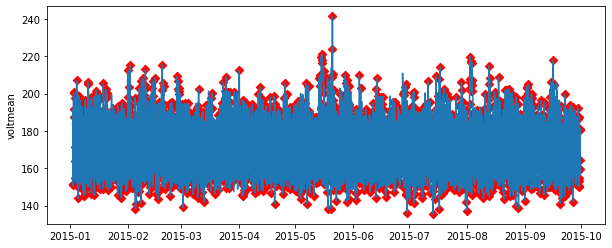

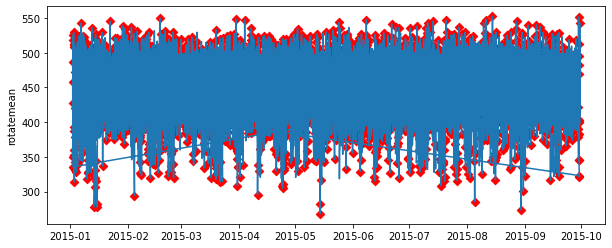

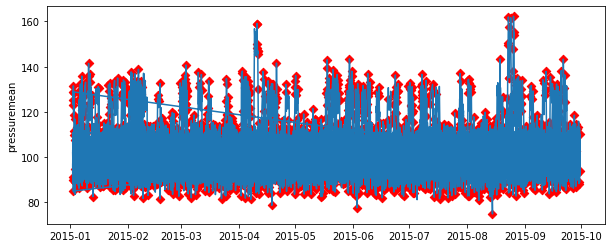

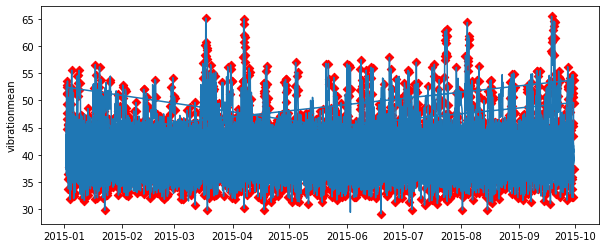

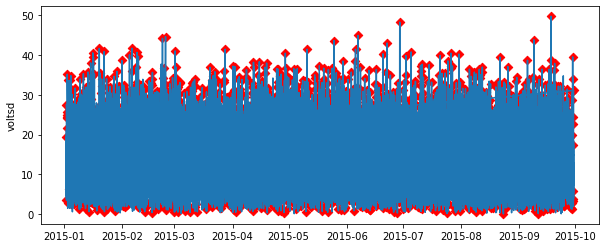

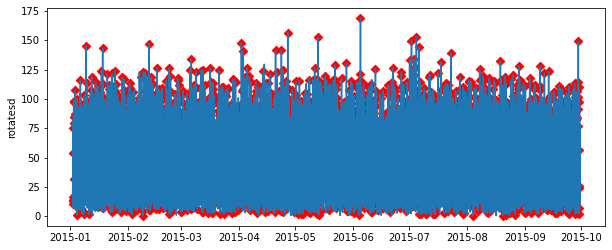

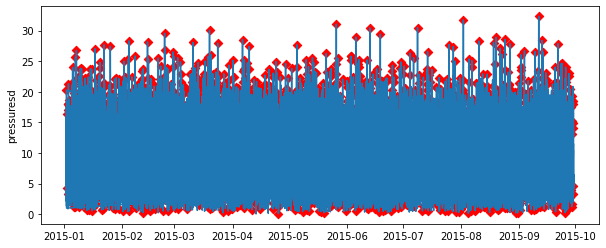

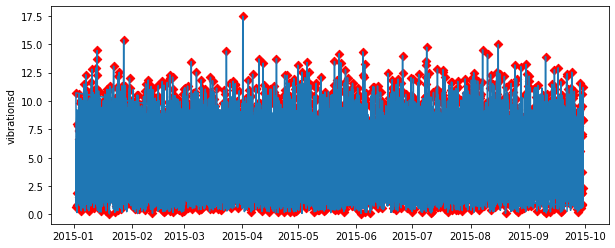

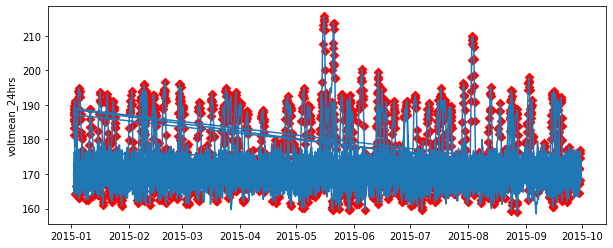

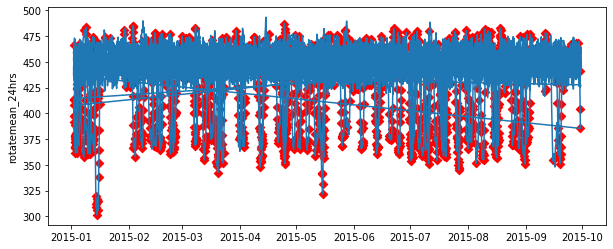

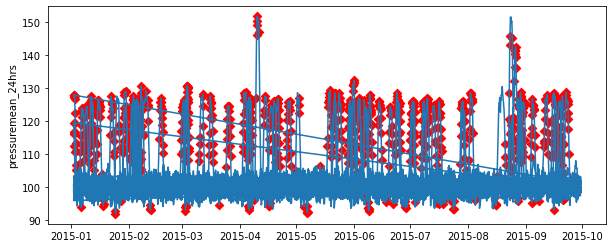

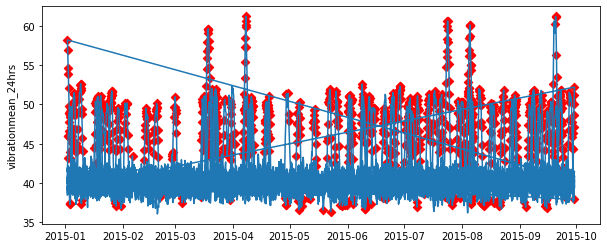

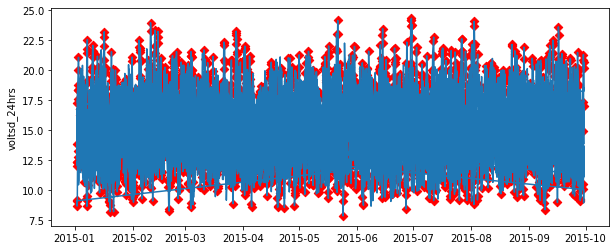

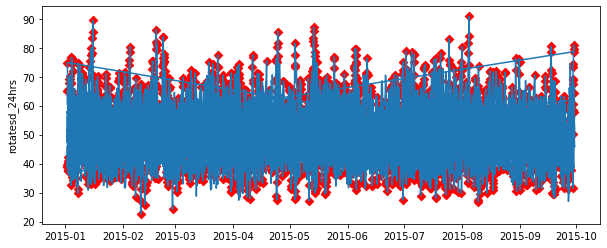

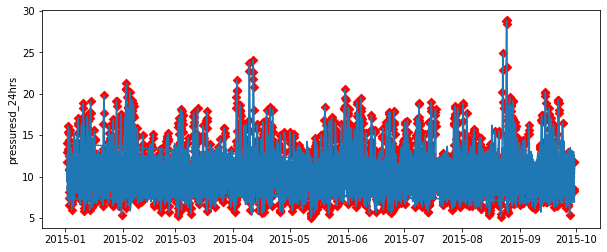

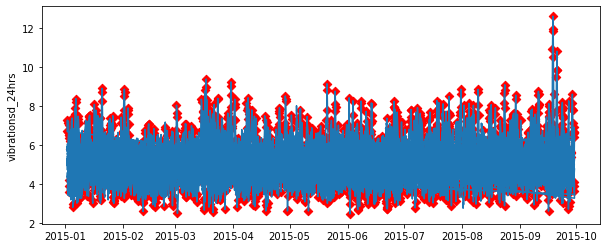

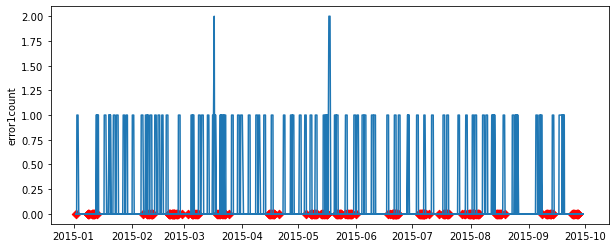

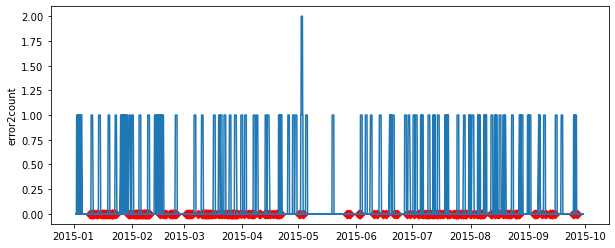

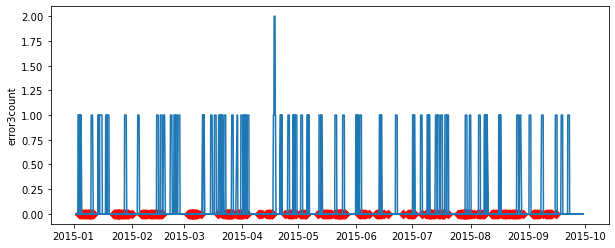

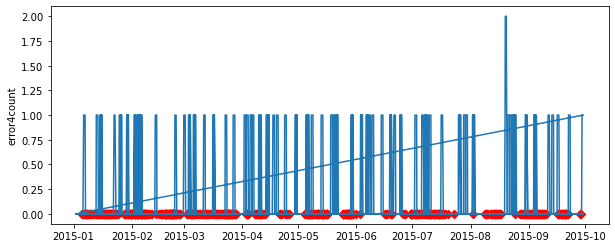

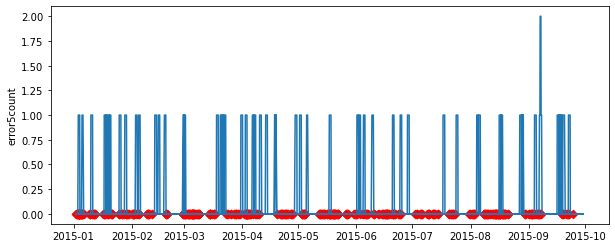

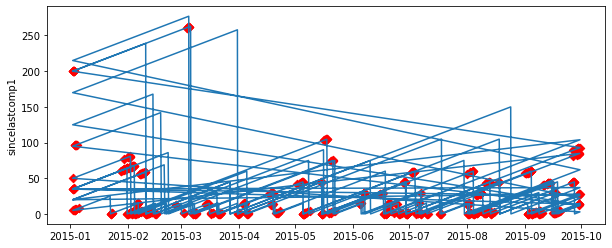

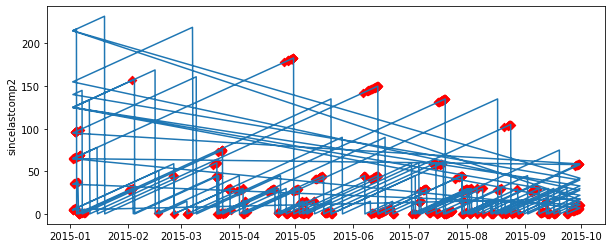

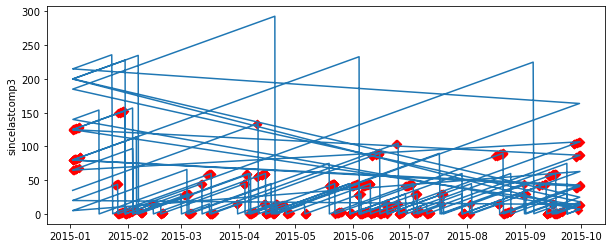

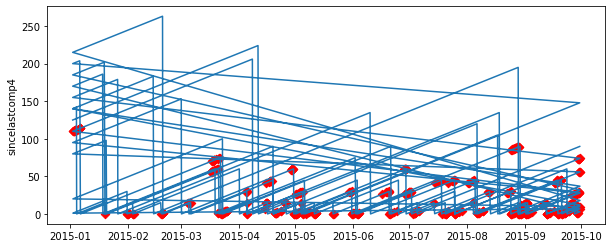

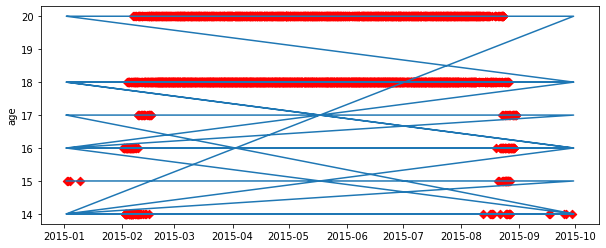

In [10]:
count = 0
anomaly_data_frame = pd.DataFrame()
unneccesary_columns = []

for column in dataset.columns:
    if ((type(dataset[column][0]) != np.float64) and (type(dataset[column][0]) != np.int64)):
        unneccesary_columns.append(column)

for column in dataset.columns:
     if ((type(dataset[column][0]) == np.float64) or (type(dataset[column][0]) == np.int64)):
        df = pd.DataFrame(dataset[column])
        #df = df.resample('M').mean().ffill()      #If there is no known freq in the index that how many observation need to pick for a season (check the link in the above cell)
                                                  #otherwise we need to define the period in below line and comment/remove the resample line
        seasonal, trend, resid = seasonal_decompose_func(df ,p=12 ,r= True)
        if count == 0:
            anomalies, dataset = iqr (resid,df, dataset)
            
            plt.figure(figsize=(10,4))
            plt.plot(df.index, df)
            plt.ylabel(column)
            plt.scatter(anomalies.index, anomalies, color='r', marker='D')
            
             
            anomaly_data_frame[column] = [int(anomalies.count())]
            print(str(column) + " anomalies number is" + str(anomalies.shape))
        else:
            anomalies, dataset = iqr (resid, df, dataset)
            
            plt.figure(figsize=(10,4))
            plt.plot(df.index, df)
            plt.ylabel(column)
            plt.scatter(anomalies.index, anomalies, color='r', marker='D')
            
            
            anomaly_data_frame[column] = [int(anomalies.count())]
            print(str(column) + " anomalies number is" + str(anomalies.shape))
        count+=1
        

In [11]:
for column in unneccesary_columns:
        dataset = dataset.drop([column], axis = 1)
dataset.head()

,voltmean,rotatemean,pressuremean,vibrationmean,voltsd,rotatesd,pressuresd,vibrationsd,voltmean_24hrs,rotatemean_24hrs,...,error1count,error2count,error3count,error4count,error5count,sincelastcomp1,sincelastcomp2,sincelastcomp3,sincelastcomp4,age
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-02 05:00:00+00:00,Normal,Normal,Outlier,Normal,Outlier,Normal,Normal,Normal,Normal,Normal,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
2015-01-02 08:00:00+00:00,Normal,Normal,Normal,Normal,Normal,Outlier,Normal,Normal,Normal,Normal,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
2015-01-02 11:00:00+00:00,Normal,Normal,Normal,Normal,Outlier,Normal,Normal,Normal,Normal,Normal,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Outlier
2015-01-02 14:00:00+00:00,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
2015-01-02 17:00:00+00:00,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal


In [13]:
anomaly_data_frame

,voltmean,rotatemean,pressuremean,vibrationmean,voltsd,rotatesd,pressuresd,vibrationsd,voltmean_24hrs,rotatemean_24hrs,...,error1count,error2count,error3count,error4count,error5count,sincelastcomp1,sincelastcomp2,sincelastcomp3,sincelastcomp4,age
0,2198,2213,2025,2105,2157,2146,2152,2151,1700,1542,...,391,524,889,834,798,648,694,676,594,3752
